In [ ]:
# Data Cleaning portion here

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Datasets/T20_dataset.csv")

NameError: ignored

In [ ]:
df.isnull().sum()

Unnamed: 0        0
matchId           0
balls             0
runs              0
tossWinner     2976
battingTeam       0
bowlingTeam       0
player_out        0
city              0
venue             0
dtype: int64

In [ ]:
missing_value = ["N/a","na",np.nan]
df = pd.read_csv("/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Datasets/T20_dataset.csv",na_values=missing_value)

In [ ]:
df.isnull().sum()

Unnamed: 0        0
matchId           0
balls             0
runs              0
tossWinner     2976
battingTeam       0
bowlingTeam       0
player_out        0
city              0
venue             0
dtype: int64

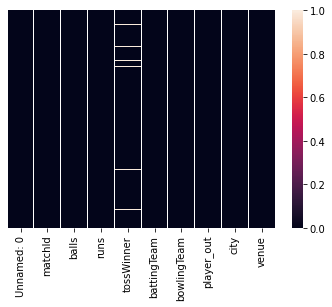

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
# There is no missing Values

df.dtypes

Unnamed: 0       int64
matchId         object
balls          float64
runs             int64
tossWinner      object
battingTeam     object
bowlingTeam     object
player_out       int64
city            object
venue           object
dtype: object

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
91959    False
91960    False
91961    False
91962    False
91963    False
Length: 91964, dtype: bool

In [ ]:
# We not need require to clean our datasets now we are going to train and test or dataset



In [ ]:
df.describe()

,Unnamed: 0,balls,runs,player_out
count,91964.000000,91964.000000,91964.000000,91964.00000
mean,60.752468,9.726997,1.295474,0.05351
std,35.730011,5.757635,1.576264,0.22505
min,0.000000,0.100000,0.000000,0.00000
25%,30.000000,4.600000,0.000000,0.00000
50%,60.000000,9.600000,1.000000,0.00000
75%,91.000000,14.600000,1.000000,0.00000
max,133.000000,19.900000,7.000000,1.00000


In [ ]:
# Providing the input and output data
# Let's add Input data (x, regressor)

# x = np.array(df["balls"]).reshape(-1,1)


# x = data.iloc[:,3]
# y = data.iloc[:,2]
# x = df.iloc[:, :-1].values
# y = df.iloc[:, 4].values

cols = ["matchId",	"balls",	"runs",	"tossWinner",	"battingTeam",	"bowlingTeam",	"player_out",	"city",	"venue"]

In [ ]:
cols

['matchId',
 'balls',
 'runs',
 'tossWinner',
 'battingTeam',
 'bowlingTeam',
 'player_out',
 'city',
 'venue']

In [ ]:
len(cols)

9

In [ ]:
df.head()

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,venue
0,0,5_1,0.1,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,1,5_1,0.2,0,India,West Indies,India,1,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,2,5_1,0.3,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,3,5_1,0.4,1,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,4,5_1,0.5,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91964 entries, 0 to 91963
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   91964 non-null  int64  
 1   matchId      91964 non-null  object 
 2   balls        91964 non-null  float64
 3   runs         91964 non-null  int64  
 4   tossWinner   88988 non-null  object 
 5   battingTeam  91964 non-null  object 
 6   bowlingTeam  91964 non-null  object 
 7   player_out   91964 non-null  int64  
 8   city         91964 non-null  object 
 9   venue        91964 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 7.0+ MB


In [ ]:
num_cols =["balls","runs","player_out"]

numeric_df = df[num_cols]
numeric_df

,balls,runs,player_out
0,0.1,0,0
1,0.2,0,1
2,0.3,0,0
3,0.4,1,0
4,0.5,0,0
...,...,...,...
91959,19.2,1,0
91960,19.3,0,1
91961,19.4,2,0
91962,19.5,1,0


In [ ]:
numeric_df.mean()


balls         5.757635
runs          1.576264
player_out    0.225050
dtype: float64

In [ ]:
numeric_df.std()

balls         5.757635
runs          1.576264
player_out    0.225050
dtype: float64

In [ ]:
normalize_df = (numeric_df-numeric_df.mean())/numeric_df.std()

In [ ]:
normalize_df

,balls,runs,player_out
0,-1.672040,-0.821864,-0.237770
1,-1.654672,-0.821864,4.205696
2,-1.637304,-0.821864,-0.237770
3,-1.619935,-0.187452,-0.237770
4,-1.602567,-0.821864,-0.237770
...,...,...,...
91959,1.645294,-0.187452,-0.237770
91960,1.662662,-0.821864,4.205696
91961,1.680031,0.446959,-0.237770
91962,1.697399,-0.187452,-0.237770


In [ ]:
# verify here
round(normalize_df.mean())

balls         0.0
runs          0.0
player_out   -0.0
dtype: float64

In [ ]:
normalize_df.std()

balls         1.0
runs          1.0
player_out    1.0
dtype: float64

In [ ]:
normalize_df["runs"] = numeric_df["runs"]

In [ ]:
normalize_df.head()

,balls,runs,player_out
0,-1.672040,0,-0.237770
1,-1.654672,0,4.205696
2,-1.637304,0,-0.237770
3,-1.619935,1,-0.237770
4,-1.602567,0,-0.237770


In [ ]:
normalize_df.sample(10)

,balls,runs,player_out
57939,0.082152,1,-0.23777
1978,1.523717,6,-0.23777
24320,-0.421527,1,-0.23777
37188,0.307939,4,-0.23777
72673,1.124247,1,-0.23777
69330,-0.925206,0,-0.23777
83500,-1.619935,1,-0.23777
4548,1.662662,2,-0.23777
43918,-1.498358,2,-0.23777
54390,0.446885,0,-0.23777


In [ ]:
normalize_df = normalize_df.sample(frac=1,random_state=123)
normalize_df

,balls,runs,player_out
5872,-0.925206,1,-0.23777
76161,-0.560473,3,-0.23777
37009,-1.411517,0,-0.23777
72680,-1.602567,0,-0.23777
71743,-0.751523,6,-0.23777
...,...,...,...
63206,1.645294,1,-0.23777
61404,-0.091530,0,-0.23777
17730,0.082152,0,-0.23777
28030,-1.289939,0,-0.23777


In [ ]:
# training and testing

In [ ]:
normalize_df.shape

(91964, 3)

In [ ]:
len(normalize_df)*.75

68973.0

In [ ]:
train = normalize_df[:68973]
test = normalize_df[68973:]

In [ ]:
train.shape

(68973, 3)

In [ ]:
test.shape

(22991, 3)

In [ ]:
len(train)+len(test)

91964

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
test.iloc[0]

balls        -0.213108
runs          2.000000
player_out   -0.237770
Name: 29795, dtype: float64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
features = ["balls","player_out"]

target = ["runs"]

In [ ]:
knn.fit(train[features],train[target])

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
prediction = knn.predict(test[features])

In [ ]:
prediction

array([0, 2, 1, ..., 1, 4, 1])

In [ ]:
test["runs"].head()

29795    2
44759    1
58451    1
51908    4
42005    0
Name: runs, dtype: int64

In [ ]:
test["predicted_run"]=prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test[["runs","predicted_run"]]

,runs,predicted_run
29795,2,0
44759,1,2
58451,1,1
51908,4,0
42005,0,0
...,...,...
63206,1,1
61404,0,0
17730,0,1
28030,0,4


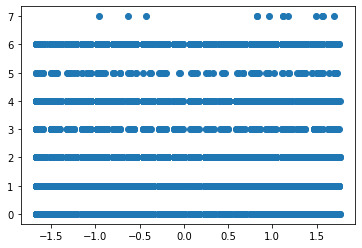

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train["balls"],train[target])



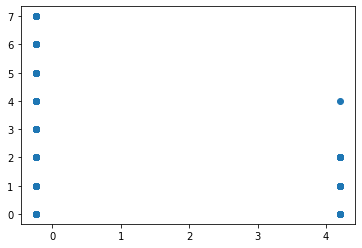

In [ ]:
plt.scatter(train["player_out"],train[target])